In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance
from google.colab.patches import cv2_imshow

<CENTER><B>FACE RECOGNITION</B></CENTER>

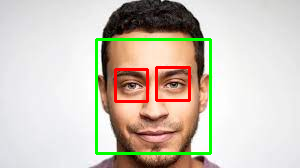

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+"haarcascade_eye.xml")

image = cv2.imread("/content/download.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(30, 30),
    flags=cv2.CASCADE_SCALE_IMAGE)
for (x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
  eye_grey = gray[y:y+h,x:x+w]
  eye_image = image[y:y+h,x:x+w]
  eye = eye_cascade.detectMultiScale(eye_grey)
  for (ex,ey,ew,eh) in eye:
    cv2.rectangle(eye_image,(ex,ey),(ex+ew,ey+eh),[0,0,255],2)

cv2_imshow(image)

<center><b>3D OBJECT DETECTION</b></center>

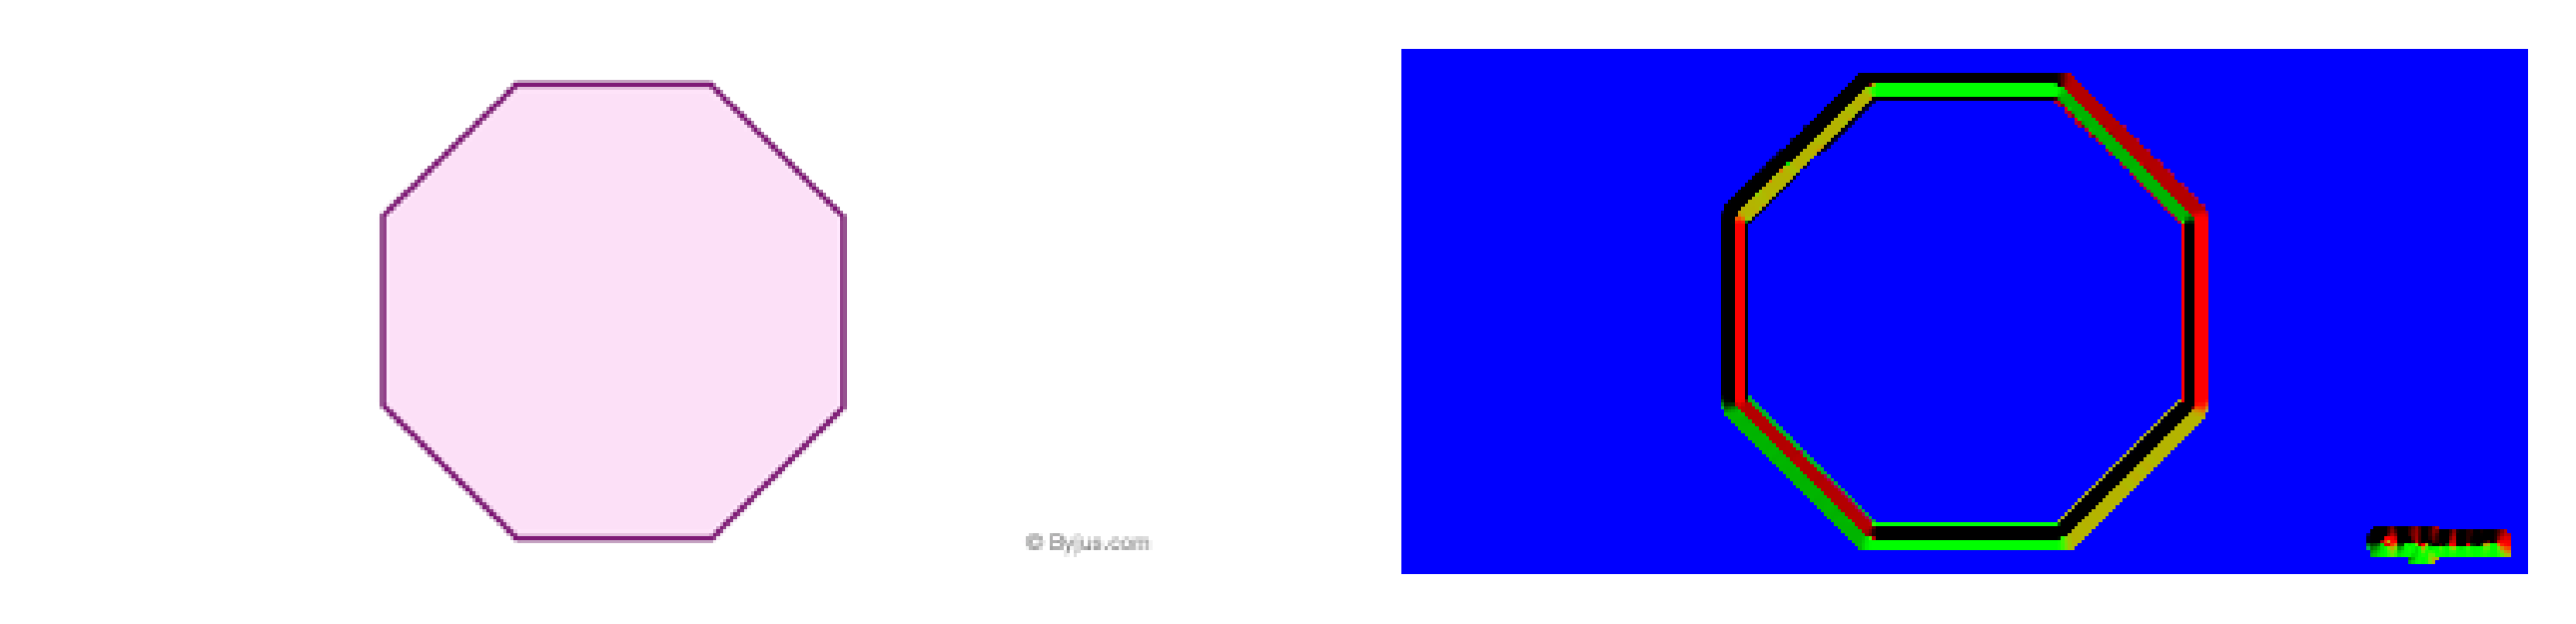

In [ ]:
image = cv2.imread("/content/sample_data/download.png")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobelz = np.ones_like(sobelx)

detected = np.dstack((sobelx,sobely,sobelz))
detected /= np.linalg.norm(detected, axis=-1, keepdims=True)

fig=plt.figure(dpi=500)
fig.add_subplot(1,2,1)
plt.imshow(image)
plt.axis("off")
fig.add_subplot(1,2,2)
plt.imshow(detected)
plt.axis("off")
plt.show()

<CENTER><B>IMAGE SEGMENTATION</B></CENTER>

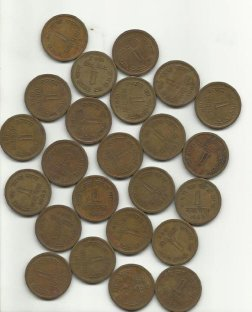

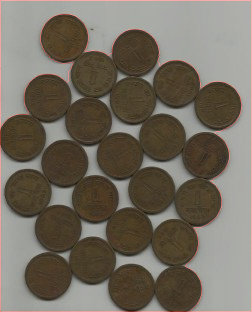

In [ ]:
image = cv2.imread("/content/sample_data/water_coins.jpg")
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
kernel = np.ones((3,3),np.uint8)

opening = cv2.morphologyEx(binary,cv2.MORPH_OPEN, kernel, iterations=2)
sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_trans = cv2.distanceTransform(opening, cv2.DIST_L2,3)
sure_fg = cv2.threshold(dist_trans, 0.7*dist_trans.max(),255,0)[1]
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)
marker = cv2.connectedComponents(sure_fg)[1]
marker = marker+1
marker[unknown==255]=0

cv2.watershed(image, marker)
colormarker = np.zeros_like(image)
colormarker[marker==-1] =[0,0,255]

segmented_image = cv2.addWeighted(image, 0.7, colormarker, 0.3, 0)

cv2_imshow(image)
cv2_imshow(segmented_image)

<center><b>HOUGH LINE DETECTION</b></center>

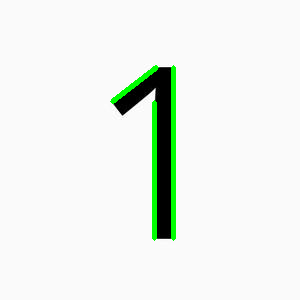

In [ ]:
image = cv2.imread("/content/sample_data/1.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(x,y) = image.shape[:2]
edges = cv2.Canny(image, x, y)
line = cv2.HoughLinesP(edges, 1, np.pi/180, 50,minLineLength=5, maxLineGap=5)

for points in line:
  (x1,y1,x2,y2)=points[0]
  cv2.line(image, (x1,y1),(x2,y2),(0,255,0),3)

cv2_imshow(image)

<CENTER><B>MORPHOLOGICAL OPERATIONS </B></CENTER>

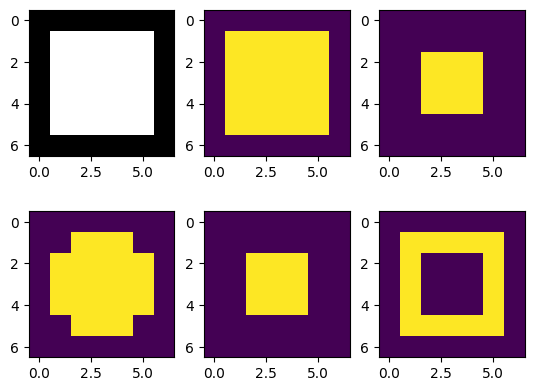

In [ ]:
#erosion
def erosion(image, se):
  (n,m) = (len(image), len(image[0]))
  result =[ [0 for i in range(m)] for j in range(n)]
  for i in range(1, n-1):
    for j in range(1, m-1):
      min_value = 255
      for k in range(-1, 2):
        for l in range(-1, 2):
          if(se[l+1][k+1]==255):
            min_value = min(image[i+k][j+l], min_value)
      result[i][j]=min_value
  return result

def dilation(image, se):
  (n,m) = (len(image), len(image[0]))
  result =[ [0 for i in range(m)] for j in range(n)]
  for i in range(1, n-1):
    for j in range(1, m-1):
      max_value = 0
      for k in range(-1, 2):
        for l in range(-1, 2):
          if(se[l+1][k+1]==255):
            max_value = max(image[i+k][j+l], max_value)
      result[i][j]=max_value
  return result

def opening(image, se):
  eroded = erosion(image, se)
  open = dilation(eroded, se)
  return open

def closing(image, se):
  dilated = dilation(image, se)
  close = erosion(dilated, se)
  return close

def boundary_extraction(image, se):
  eroded = erosion(image,se)
  boundary = np.subtract(image, eroded)
  return boundary

image =[[0,0,0,0,0,0,0],[0,255,255,255,255,255,0],[0,255,255,255,255,255,0],[0,255,255,255,255,255,0],[0,255,255,255,255,255,0],[0,255,255,255,255,255,0],[0,0,0,0,0,0,0]]
se = [[0,255,0],[255,255,255],[0,255,0]]

dilate = dilation(image, se)
erode = erosion(image, se)
open = opening(image, se)
close = closing(image, se)
boundary = boundary_extraction(image, se)

cv2_imshow(np.array(dilate))

plt.show()
plt.subplot(2,3,1)
plt.imshow(image,cmap="gray")
plt.subplot(2,3,2)
plt.imshow(dilate)
plt.subplot(2,3,3)
plt.imshow(erode)
plt.subplot(2,3,4)
plt.imshow(open)
plt.subplot(2,3,5)
plt.imshow(close)
plt.subplot(2,3,6)
plt.imshow(boundary)

<center><b>EDGE DETECTION </b></center>

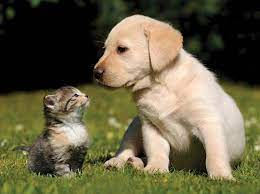

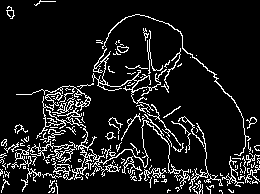

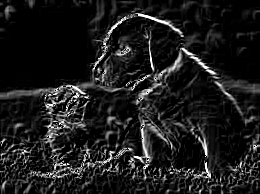

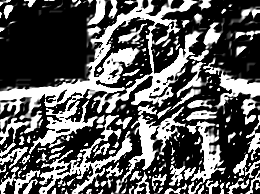

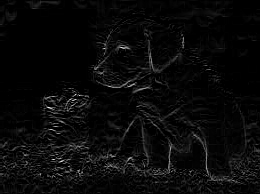

In [ ]:
image = cv2.imread("/content/dog and cat.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#canny
canny = cv2.Canny(gray, 100, 200)

#sobel
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
sobel = sobelx+sobely

#prewitt
kernelx = np.array([[-1, -1, -1],[0,0,0],[1,1,1]])
kernely = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
prewittx = cv2.filter2D(gray, -1, kernelx)
prewitty = cv2.filter2D(gray, -1, kernely)
prewitt = prewittx+prewitty

#robert edge
kernelx = np.array([[0,1],[-1,0]])
kernely = np.array([[1,0],[0,-1]])
robertx = cv2.filter2D(gray, -1, kernelx)
roberty = cv2.filter2D(gray, -1, kernely)
robert = robertx+roberty

cv2_imshow(image)
cv2_imshow(canny)
cv2_imshow(prewitt)
cv2_imshow(sobel)
cv2_imshow(robert)

<center><b>IMAGE NOISE</b></center>

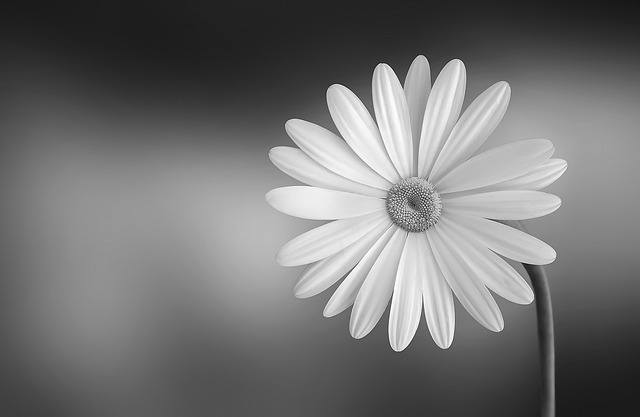

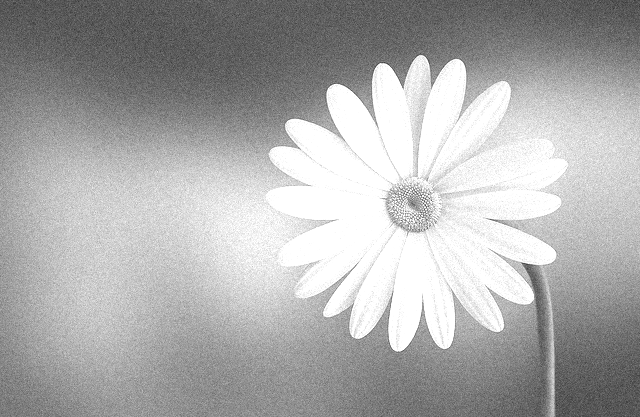

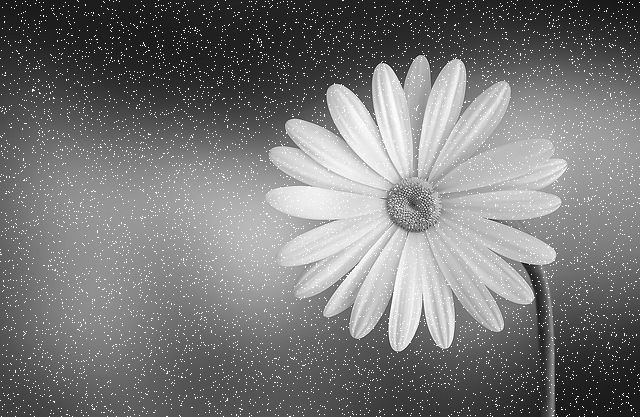

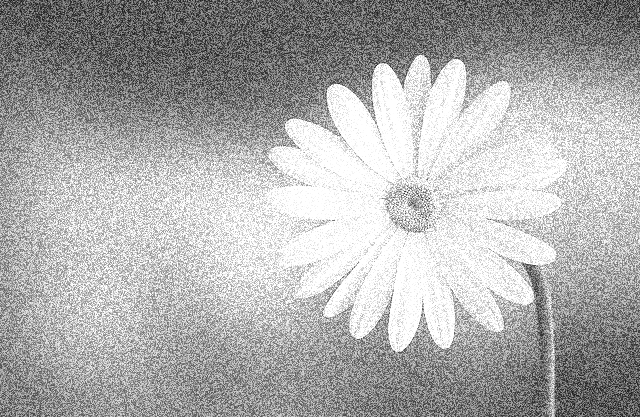

In [ ]:
image = cv2.imread("/content/sample_data/flower.jpg",0)
#gaussian_noise
gaussian_noise = np.zeros(image.shape, dtype=image.dtype)
cv2.randn(gaussian_noise, 120, 20)
gaussian_noise = (gaussian_noise*0.5).astype(np.uint8)
gaussian_image = cv2.add(image, gaussian_noise)

#impulse_noise
impulse_noise = np.zeros(image.shape, dtype=image.dtype)
cv2.randu(impulse_noise, 0, 255)
impulse_noise = cv2.threshold(impulse_noise, 245, 255, cv2.THRESH_BINARY)[1]
impulse_image = cv2.add(impulse_noise, image)

#uniform_noise
uniform_noise = np.zeros(image.shape, dtype=image.dtype)
cv2.randu(uniform_noise, 0, 255)
uniform_noise = (uniform_noise*0.5).astype(np.uint8)
uniform_image = cv2.add(image, uniform_noise)

cv2_imshow(image)
cv2_imshow(gaussian_image)
cv2_imshow(impulse_image)
cv2_imshow(uniform_image)

<CENTER><B>IMAGE FILTERING</B></CENTER>

AVERAGE FILTERING

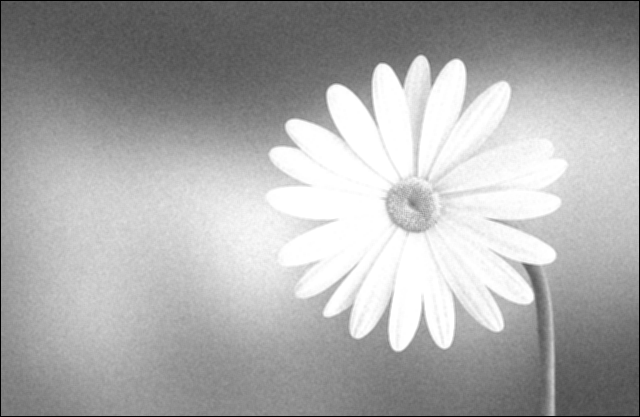

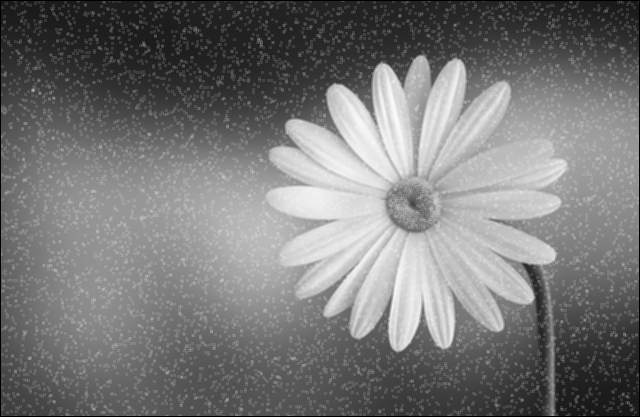

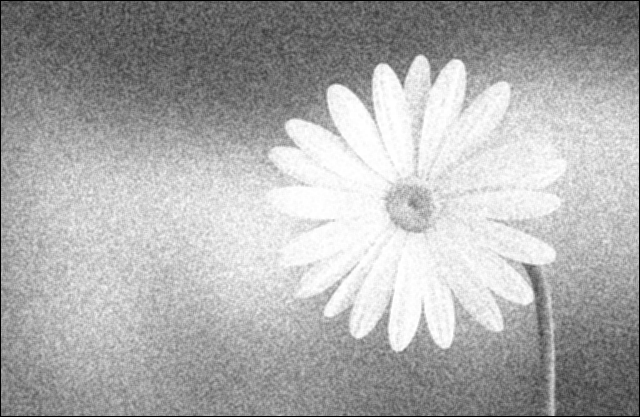

In [ ]:
def averaging(image):
  (m,n) = image.shape[:2]
  result = np.zeros([m,n])
  mask = np.ones([3,3], dtype=int)
  mask = mask/9
  for i in range(1,m-1):
    for j in range(1,n-1):
      temp = (image[i-1,j-1]*mask[0,0]+image[i-1,j]*mask[0,1]+image[i-1,j+1]*mask[0,2]+image[i,j-1]*mask[1,0]+image[i,j]*mask[1,1]+image[i,j+1]*mask[1,2]+image[i+1,j-1]*mask[2,0]+image[i+1,j]*mask[2,1]+image[i+1,j+1]*mask[2,2])
      result[i,j]=temp
  result = np.uint8(result)
  return result

gaussian_average = averaging(gaussian_image)
impulse_average = averaging(impulse_image)
uniform_average = averaging(uniform_image)

cv2_imshow(gaussian_average)
cv2_imshow(impulse_average)
cv2_imshow(uniform_average)

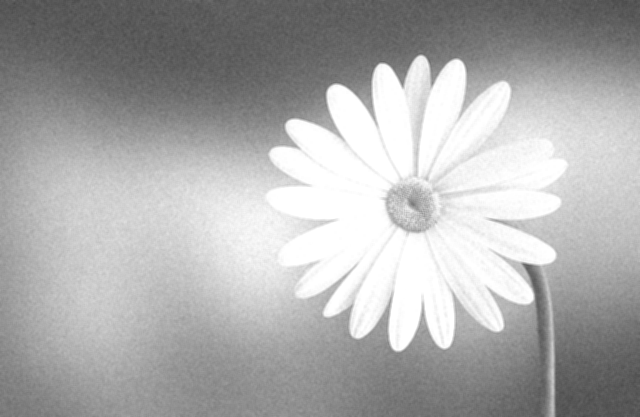

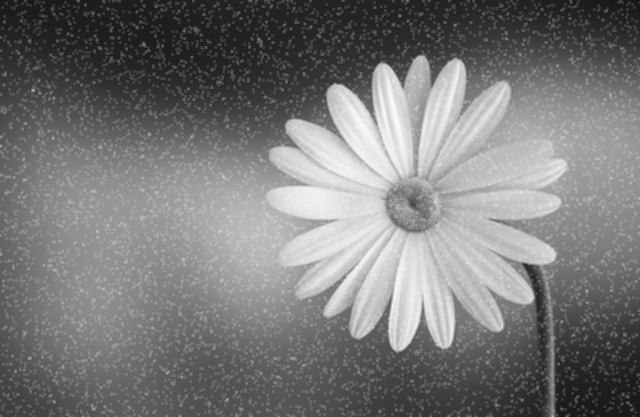

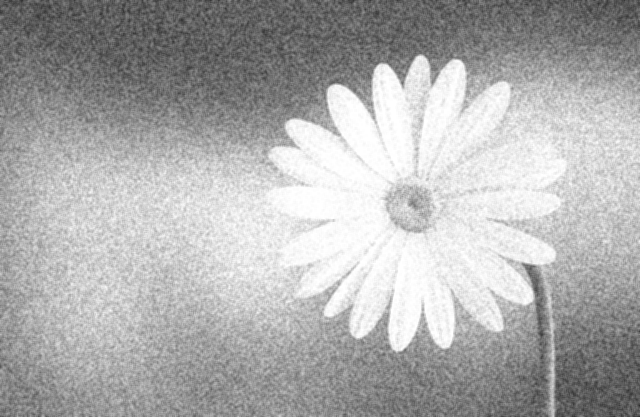

In [ ]:
gaussian_average = cv2.blur(gaussian_image, (3,3))
impulse_average = cv2.blur(impulse_image, (3,3))
uniform_average = cv2.blur(uniform_image, (3,3))

cv2_imshow(gaussian_average)
cv2_imshow(impulse_average)
cv2_imshow(uniform_average)

MEDIAN FILTER

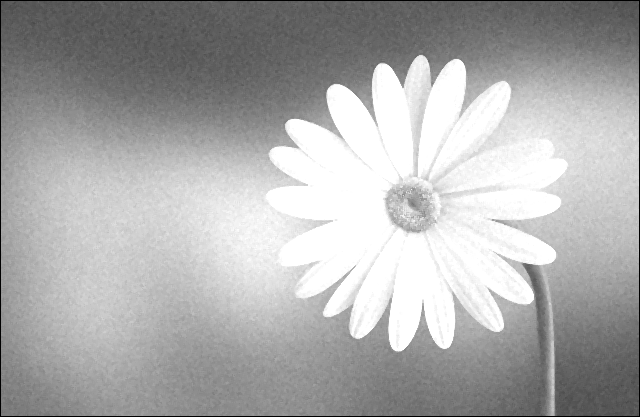

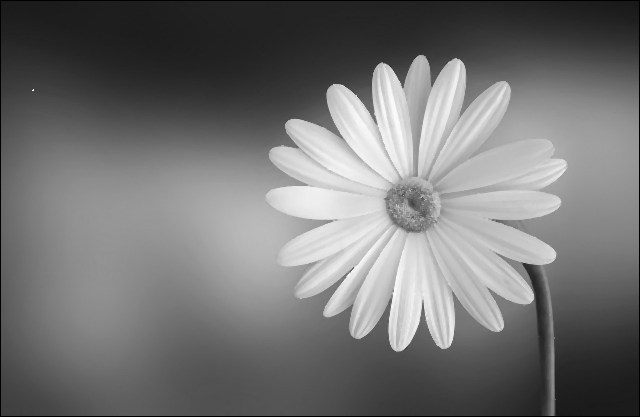

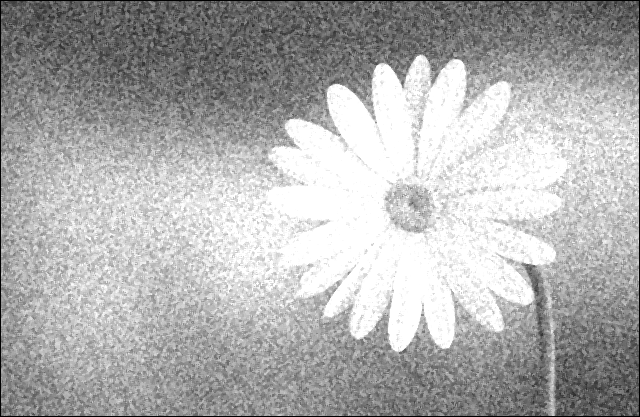

In [ ]:
def median(image):
  (m,n) = image.shape[:2]
  result = np.zeros([m,n])
  for i in range(1,m-1):
    for j in range(1,n-1):
      temp = [image[i-1,j-1],image[i-1,j],image[i-1,j+1],image[i,j-1],image[i,j],image[i,j+1],image[i+1,j-1],image[i+1,j],image[i+1,j+1]]
      temp = sorted(temp)
      result[i,j]=temp[4]
  result = np.uint8(result)
  return result

gaussian_median = median(gaussian_image)
impulse_median = median(impulse_image)
uniform_median = median(uniform_image)

cv2_imshow(gaussian_median)
cv2_imshow(impulse_median)
cv2_imshow(uniform_median)

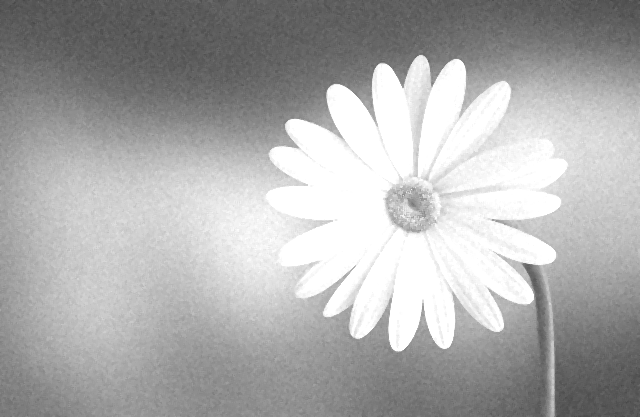

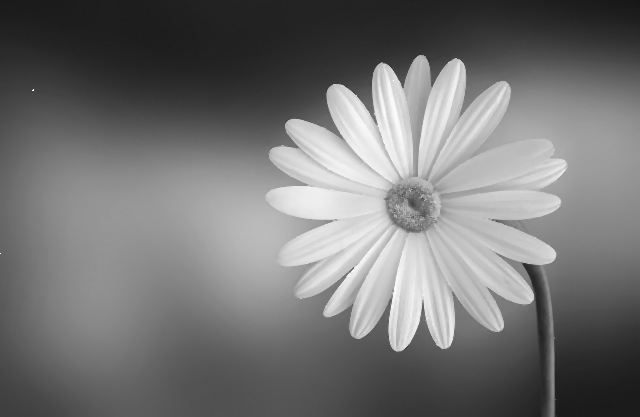

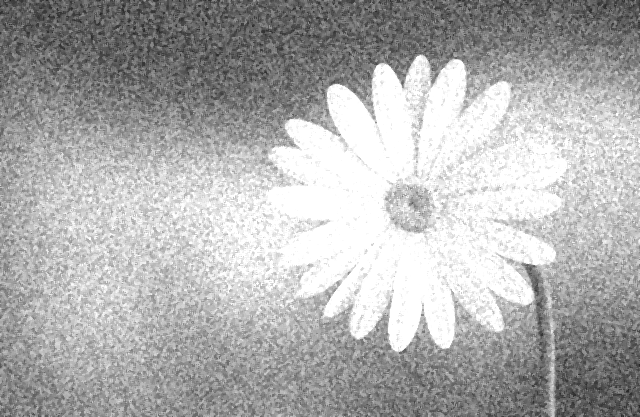

In [ ]:
gaussian_median = cv2.medianBlur(gaussian_image,ksize=3)
impulse_median = cv2.medianBlur(impulse_image,ksize=3)
uniform_median = cv2.medianBlur(uniform_image,ksize=3)

cv2_imshow(gaussian_median)
cv2_imshow(impulse_median)
cv2_imshow(uniform_median)

GAUSSIAN FILTER

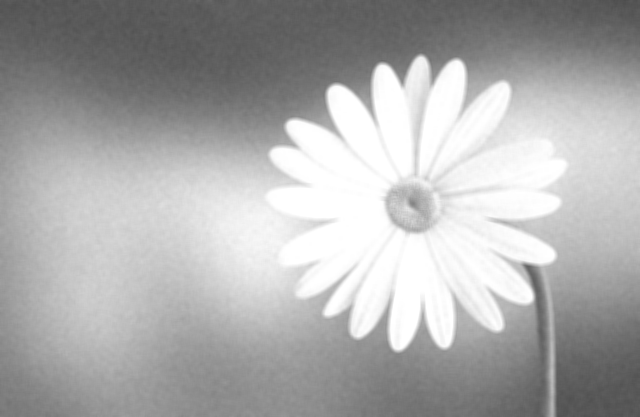

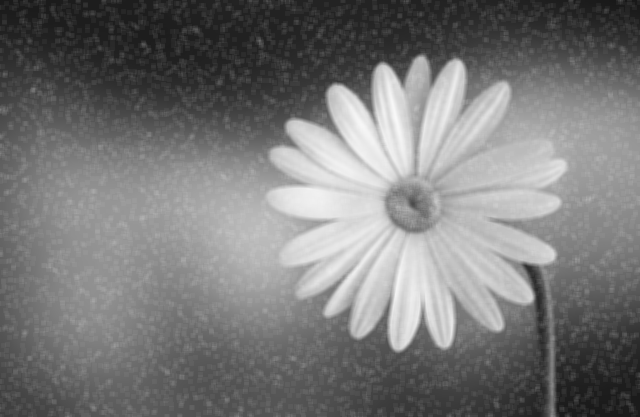

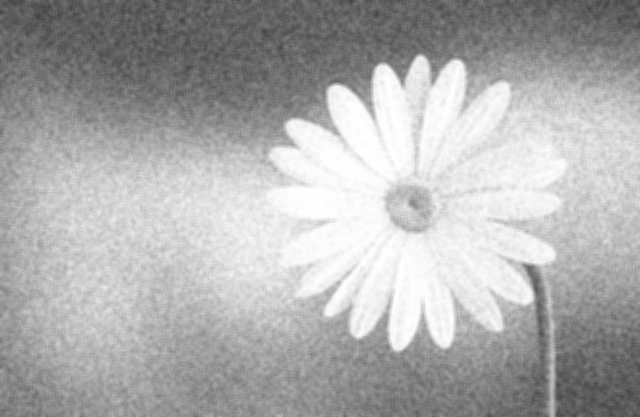

In [ ]:
gaussian_gaussian = cv2.GaussianBlur(gaussian_image, (5,5), cv2.BORDER_DEFAULT)
impulse_gaussian = cv2.GaussianBlur(impulse_image,(5,5), cv2.BORDER_DEFAULT)
uniform_gaussian = cv2.GaussianBlur(uniform_image, (5,5), cv2.BORDER_DEFAULT)

cv2_imshow(gaussian_gaussian)
cv2_imshow(impulse_gaussian)
cv2_imshow(uniform_gaussian)

<center><b>IMAGE PROCESSING OPERATIONS</b></center>

GRAY SCALE

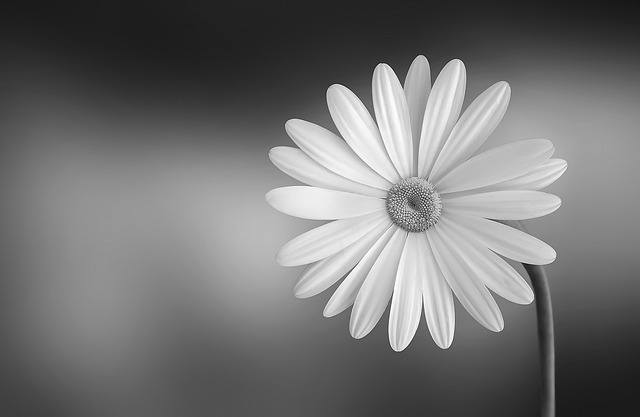

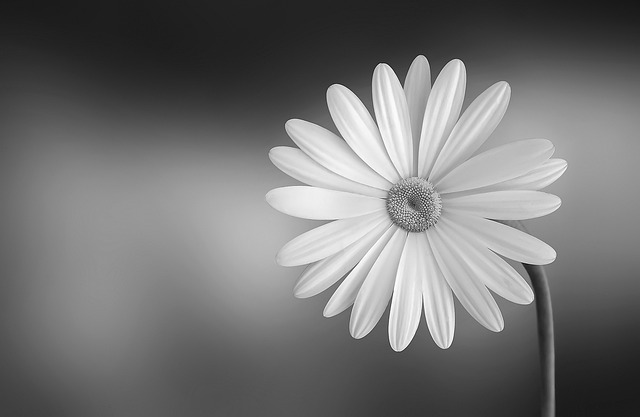

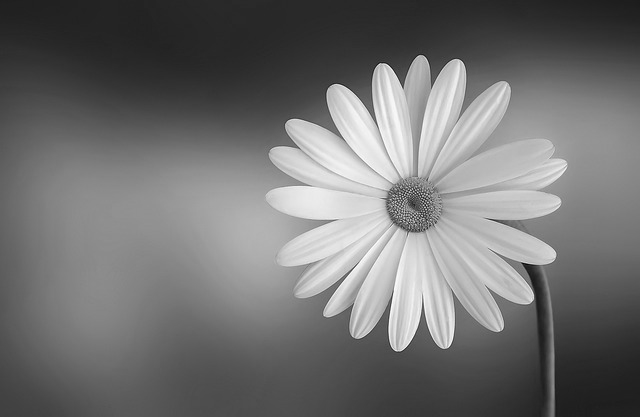

In [ ]:
#convert to gray scale
#1. using 0
image = cv2.imread("/content/sample_data/flower.jpg")
gray = cv2.imread("/content/sample_data/flower.jpg",0)
cv2_imshow(gray)
#2. using function
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)
#3. without inbuilt
gray = image
(x,y) = image.shape[:2]
for i in range(x):
  for j in range(y):
    gray[i,j]=sum(image[i,j])*0.33
cv2_imshow(gray)

ADDITION AND SUBTRACTION

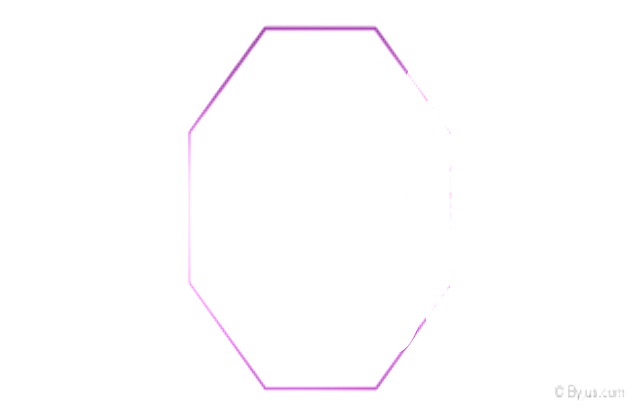

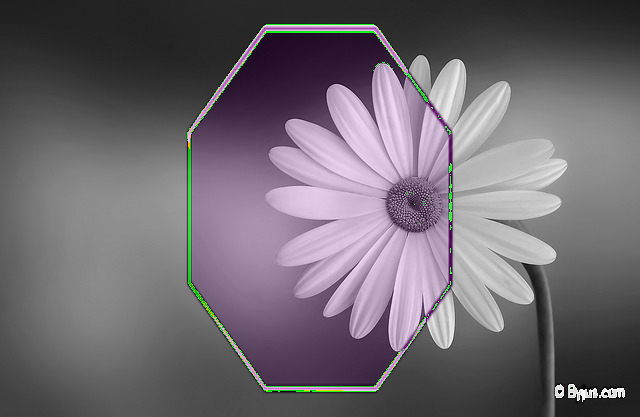

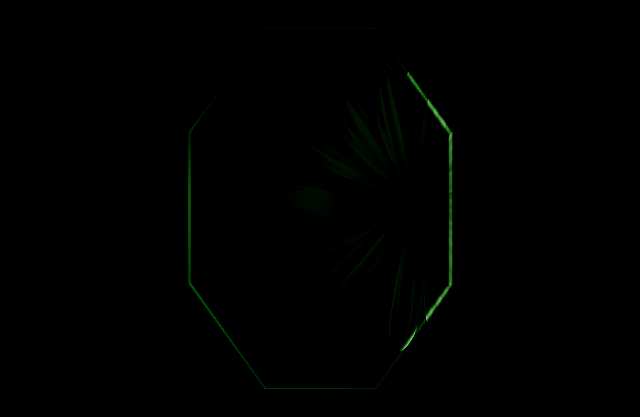

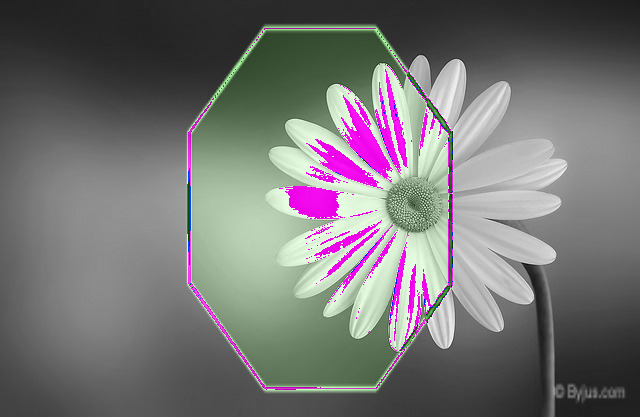

In [ ]:
image2 = cv2.imread("/content/sample_data/download.png")
(x,y)=image.shape[:2]
image2 = cv2.resize(image2, (y,x))

#add
add = cv2.add(image2, image)
cv2_imshow(add)
add = image+image2
cv2_imshow(add)
#sub
sub = cv2.subtract(image, image2)
cv2_imshow(sub)
sub = image-image2
cv2_imshow(sub)

NEGATIVE IMAGE

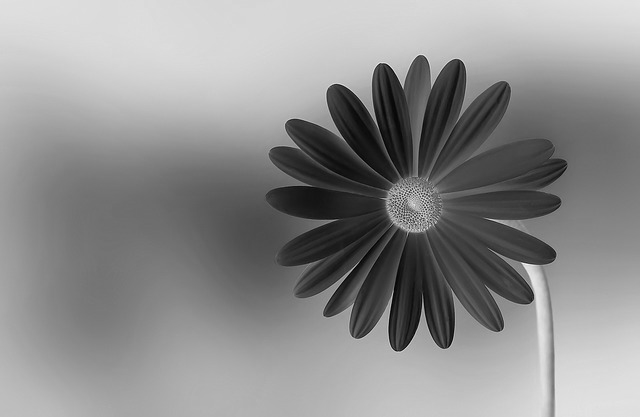

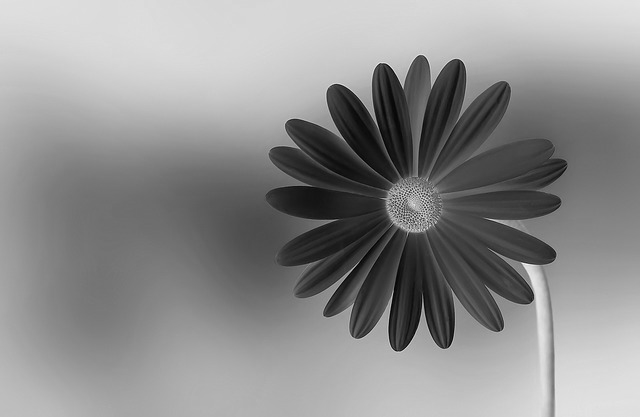

In [ ]:
bit_not = cv2.bitwise_not(image)
cv2_imshow(bit_not)
bit_not = 255 - image
cv2_imshow(bit_not)

ENHANCEMENT

In [ ]:
img = Image.open("/content/sample_data/water_coins.jpg")

#brightness enhancement

bright = ImageEnhance.Brightness(img)
value = 2.8
bright = bright.enhance(value)
bright.show()

#sharpness enhancement
sharp = ImageEnhance.Sharpness(img)
value = 2.8
sharp = sharp.enhance(value)
sharp.show()

#color enhancement
color = ImageEnhance.Color(img)
value = 2.8
color = color.enhance(value)
color.show()

#contrast enhancement
contrast = ImageEnhance.Contrast(img)
value = 2.8
contrast = contrast.enhance(value)
contrast.show()

plt.show()

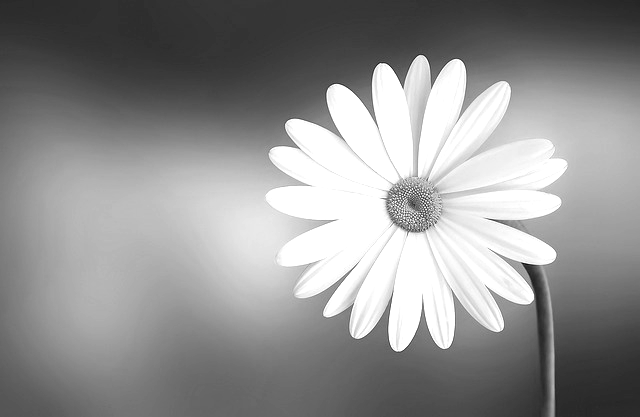

In [ ]:
brightness = 0.7
contrast= 1.3
enhance_image = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)
cv2_imshow(enhance_image)

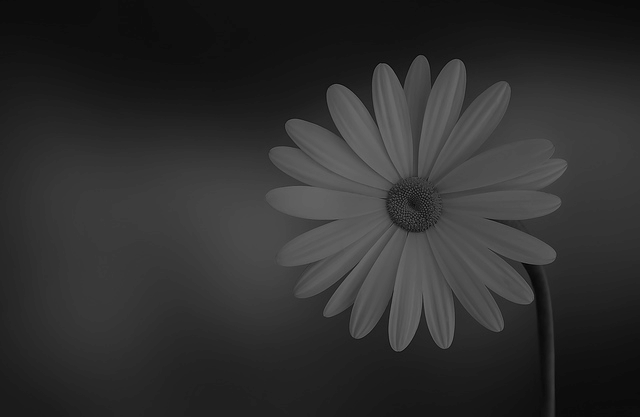

In [ ]:
enhance_image = image
brightness_multiplier = 1.7
#lightnen -> brightness_multiplier = 1.1
#darken -> brightness_multiplier =0.9

for i in range (0,len(enhance_image)):
    for j in range(0,len(enhance_image[i])):
        for k in range(0,len(enhance_image[i,j])):
            enhance_image[i,j,k] = int(enhance_image[i,j,k]*brightness_multiplier)
            if(enhance_image[i,j,k]>255):
                enhance_image[i,j,k]=255
            if(enhance_image[i,j,k]<0):
                enhance_image[i,j,k]=0

cv2_imshow(enhance_image)

HISTOGRAM EQUALIZATION

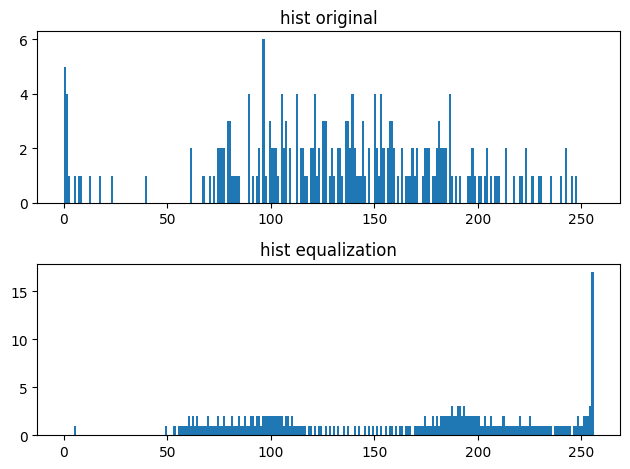

In [9]:
def histogram_equilization(image):

    image=image.tolist()
    #image=[[4,4,4,4,4],[7,5,5,5,4],[7,5,5,7,5],[7,7,7,7,15],[7,7,7,7,7]]
    maximum=max(max(x) for x in image)

    #greyscale
    greyscale=[]
    for i in range(0,maximum+1):
        greyscale.append(i)

    #frequency
    frequency=[]
    for i in greyscale:
        frequency.append(sum(x.count(i) for x in image) )

    summation = sum(i for i in frequency)
    #pdf
    pdf=[]
    for i in frequency:
        pdf.append(i/summation)

    #cdf
    cdf=[pdf[0]]
    for i in range(1,len(pdf)):
        cdf.append(cdf[i-1]+pdf[i])

    #cdf*max(image)
    for i in range(len(cdf)):
        cdf[i]=cdf[i]*maximum


    #equalization
    equilization=[]
    for i in cdf:
        equilization.append(round(i))

    equilization = np.array(equilization)
    frequency = np.array(frequency)

    plt.subplot(2,1,1)
    plt.hist(frequency, 256, range=[0,256])
    plt.title("hist original")

    plt.subplot(2,1,2)
    plt.hist(equilization,256, range=[0,256])
    plt.title("hist equalization")

    plt.tight_layout()
    plt.show()

gray_image = cv2.imread("/content/dog and cat.jpeg",0)

histogram_equilization(gray_image)

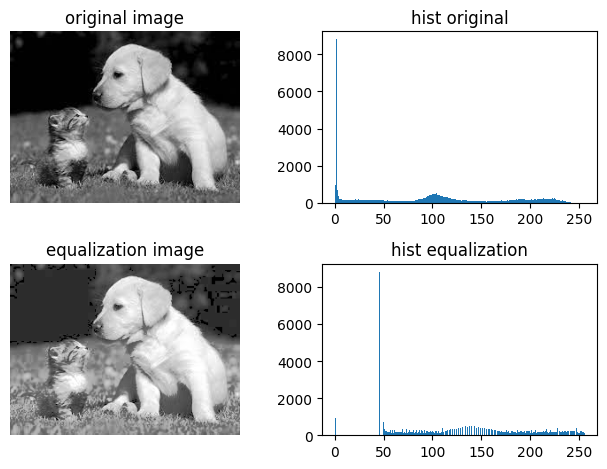

In [12]:
equalization = cv2.equalizeHist(gray_image)

plt.subplot(2,2,1)
plt.imshow(gray_image, cmap="gray")
plt.title("original image")
plt.axis("off")

#ravel-> used to change a 2d or multi dimensional array into flattened array
plt.subplot(2,2,2)
plt.hist(gray_image.ravel(), 256, [0,256])
plt.title("hist original")

plt.subplot(2,2,3)
plt.imshow(equalization, cmap="gray")
plt.title("equalization image")
plt.axis("off")

plt.subplot(2,2,4)
plt.hist(equalization.ravel(), 256, [0,256])
plt.title("hist equalization")

plt.tight_layout()#give proper space between subplot
plt.show()